In [7]:
import torch
print(torch.__version__)

2.4.1


In [1]:
from utils import *

import sys
sys.path.append('../')
from potnet import *

In [2]:
from matplotlib import pyplot as plt

## Generate ground truth data

First, we generate a ground truth dataset of size $n = 3000$.

In [3]:
gt_Xs, gt_thetas = generate_ground_truth(3000)

# POTNet

We train a $\texttt{POTNet}$ model below. The `save_checkpoint` parameter enables periodic saving of model checkpoints every `checkpoint_epoch` iterations. Set `overwrite_checkpoint` to `True` enables overwriting of previously saved checkpoints. `print_loss` argument allows the loss to be printed every `print_loss_iter` iterations.

`.save` function allows for saving the entire model.

In [5]:
potnet_model = POTNet(embedding_dim = gt_thetas.shape[1],
                      epochs = 100,
                      verbose=True,
                      print_loss=True)

potnet_model.fit(gt_thetas, 
                 epochs=100,
                 save_checkpoint=True,
                 checkpoint_epoch=50,
                 overwrite_checkpoint=False)
potnet_gen_data = potnet_model.generate(3000)
potnet_model.save(model_path = 'potnet.pkl')

Fitting POTNet...


Training POTNet:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10/100, Loss: 2.2435114979743958
Epoch 20/100, Loss: 2.117844899495443
Epoch 30/100, Loss: 2.118100106716156
Epoch 40/100, Loss: 2.085245211919149
Epoch 50/100, Loss: 2.0624752243359885
Checkpoint saved to ./checkpoints/potnet_ckpt_iter50.pth
Epoch 60/100, Loss: 2.0135143399238586
Epoch 70/100, Loss: 1.9443760613600414
Epoch 80/100, Loss: 1.991166094938914
Epoch 90/100, Loss: 1.9487730860710144
Epoch 100/100, Loss: 1.9137001832326253
Checkpoint saved to ./checkpoints/potnet_ckpt_iter100.pth
Training complete.
Model saved to potnet.pkl


POTNet generated data:


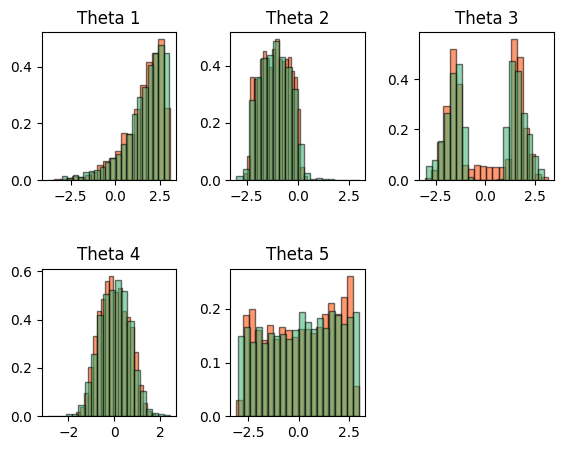

In [11]:
print("POTNet generated data:")
for j in range(potnet_gen_data.shape[1]):
    plt.subplot(2,3,j+1)
    plt.subplots_adjust(left=0.1,
            bottom=0.1,
            right=0.9,
            top=0.9,
            wspace=0.4,
            hspace=0.6)
    plt.hist(potnet_gen_data[:, j].reshape(-1), density=True, bins=20, color='orangered', edgecolor='k', alpha=0.55, label='generated');
    plt.hist(gt_thetas[:, j], density=True, bins=20, color='mediumseagreen', edgecolor='k', alpha=0.55, label='truth');
    plt.title("Theta %d" %(j+1))
plt.show()

## Load entire model from saved path

We can load the model from a saved file:

In [12]:
saved_model = load_model(model_path = 'potnet.pkl')
saved_model_gen_data = saved_model.generate(3000)

Model loaded from potnet.pkl


Saved model generated data:


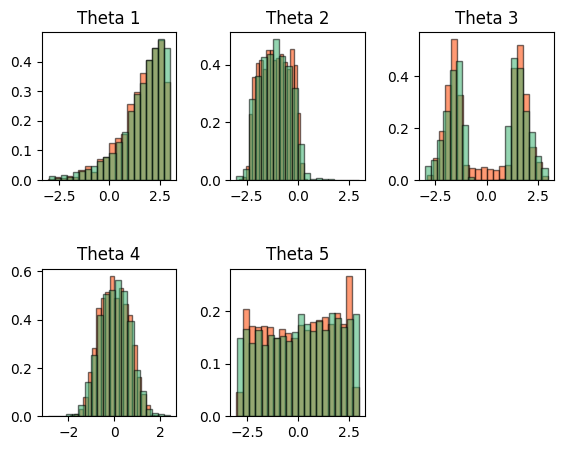

In [13]:
print("Saved model generated data:")
for j in range(saved_model_gen_data.shape[1]):
    plt.subplot(2,3,j+1)
    plt.subplots_adjust(left=0.1,
            bottom=0.1,
            right=0.9,
            top=0.9,
            wspace=0.4,
            hspace=0.6)
    plt.hist(saved_model_gen_data[:, j].reshape(-1), density=True, bins=20, color='orangered', edgecolor='k', alpha=0.55, label='generated');
    plt.hist(gt_thetas[:, j], density=True, bins=20, color='mediumseagreen', edgecolor='k', alpha=0.55, label='truth');
    plt.title("Theta %d" %(j+1))
plt.show()

## Load from checkpoint

We can also load the model from a saved checkpoint at a particular iteration:

In [ ]:
potnet_model_ckpt = POTNet(embedding_dim = gt_thetas.shape[1],
                            mp_lambdas = 1.0,
                            epochs = 100,
                            resume_checkpoint = '/Users/sophialu/Desktop/OT/POTNet/examples/checkpoints/potnet_ckpt_iter100.pth',
                            verbose=True)
ckpt_gen_data = potnet_model_ckpt.generate(3000)

Checkpoint successfully loaded from /Users/sophialu/Desktop/OT/POTNet/examples/checkpoints/potnet_ckpt_iter100.pth


Model loaded from checkpoint generated data:


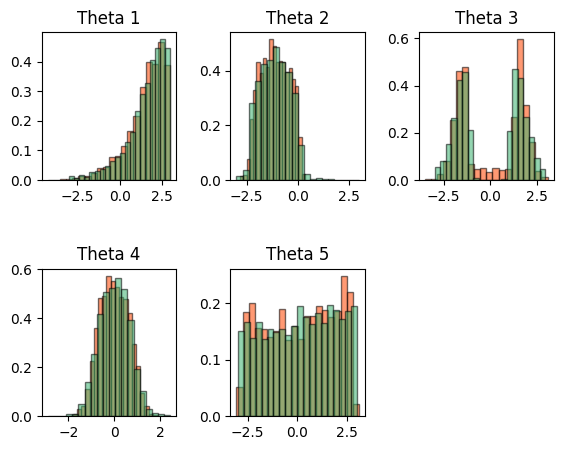

In [ ]:
print("Model loaded from checkpoint generated data:")
for j in range(ckpt_gen_data.shape[1]):
    plt.subplot(2,3,j+1)
    plt.subplots_adjust(left=0.1,
            bottom=0.1,
            right=0.9,
            top=0.9,
            wspace=0.4,
            hspace=0.6)
    plt.hist(ckpt_gen_data[:, j].reshape(-1), density=True, bins=20, color='orangered', edgecolor='k', alpha=0.55, label='generated');
    plt.hist(gt_thetas[:, j], density=True, bins=20, color='mediumseagreen', edgecolor='k', alpha=0.55, label='truth');
    plt.title("Theta %d" %(j+1))
plt.show()

# Conditional POTNet

To use the conditional version of $\texttt{POTNet}$ model, simply set `conditional = True`.

In [10]:
cond_potnet_model = POTNet(embedding_dim = gt_thetas.shape[1],
                            conditional = True,
                            epochs=100,
                            verbose=True)

cond_potnet_model.fit(gt_thetas, conditioning_data = gt_Xs, checkpoint_epoch=50)
cond_potnet_gen_data = cond_potnet_model.generate(3000, gt_Xs)

cond_potnet_model.save(model_path='cond_potnet_model.pt')

Fitting POTNet...


Training POTNet:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | Loss: 4.231448789437612
Epoch: 2 | Loss: 2.7744011084238687
Epoch: 3 | Loss: 2.525732179482778
Epoch: 4 | Loss: 2.435875574747721
Epoch: 5 | Loss: 2.304231842358907
Epoch: 6 | Loss: 2.3312755624453225
Epoch: 7 | Loss: 2.290269434452057
Epoch: 8 | Loss: 2.3821094830830893
Epoch: 9 | Loss: 2.2441807190577188
Epoch: 10 | Loss: 2.262024203936259
Epoch: 11 | Loss: 2.229886790116628
Epoch: 12 | Loss: 2.2355294227600098
Epoch: 13 | Loss: 2.2015275955200195
Epoch: 14 | Loss: 2.2354087233543396
Epoch: 15 | Loss: 2.201177656650543
Epoch: 16 | Loss: 2.1845470666885376
Epoch: 17 | Loss: 2.131327052911123
Epoch: 18 | Loss: 2.275167763233185
Epoch: 19 | Loss: 2.1597193280855813
Epoch: 20 | Loss: 2.13236994544665
Epoch: 21 | Loss: 2.1156518757343292
Epoch: 22 | Loss: 2.1472586592038474
Epoch: 23 | Loss: 2.1582808097203574
Epoch: 24 | Loss: 2.1602935791015625
Epoch: 25 | Loss: 2.124296933412552
Epoch: 26 | Loss: 2.156495134035746
Epoch: 27 | Loss: 2.0962351163228354
Epoch: 28 | Loss: 2.0939

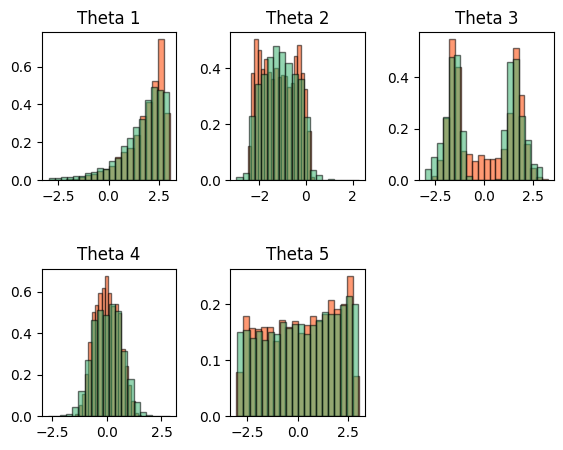

In [11]:
for j in range(cond_potnet_gen_data.shape[1]):
    plt.subplot(2,3,j+1)
    plt.subplots_adjust(left=0.1,
            bottom=0.1,
            right=0.9,
            top=0.9,
            wspace=0.4,
            hspace=0.6)
    plt.hist(cond_potnet_gen_data[:, j].reshape(-1), density=True, bins=20, color='orangered', edgecolor='k', alpha=0.55, label='generated');
    plt.hist(gt_thetas[:, j], density=True, bins=20, color='mediumseagreen', edgecolor='k', alpha=0.55, label='truth');
    plt.title("Theta %d" %(j+1))
plt.show()

# Plots

In [9]:
import seaborn as sns
import pandas as pd

In [21]:
potnet_df = pd.DataFrame({r'$\theta_1$': potnet_gen_data[:, 0], 
                          r'$\theta_2$': potnet_gen_data[:, 1], 
                          r'$\theta_3$': potnet_gen_data[:, 2],
                          r'$\theta_4$': potnet_gen_data[:, 3],
                          r'$\theta_5$': potnet_gen_data[:, 4]})

gt_df = pd.DataFrame({r'$\theta_1$': gt_thetas[:, 0],
                      r'$\theta_2$': gt_thetas[:, 1],
                      r'$\theta_3$': gt_thetas[:, 2],
                      r'$\theta_4$': gt_thetas[:, 3],
                      r'$\theta_5$': gt_thetas[:, 4]})

### Pairwise density plot for ground truth

<Figure size 640x480 with 0 Axes>

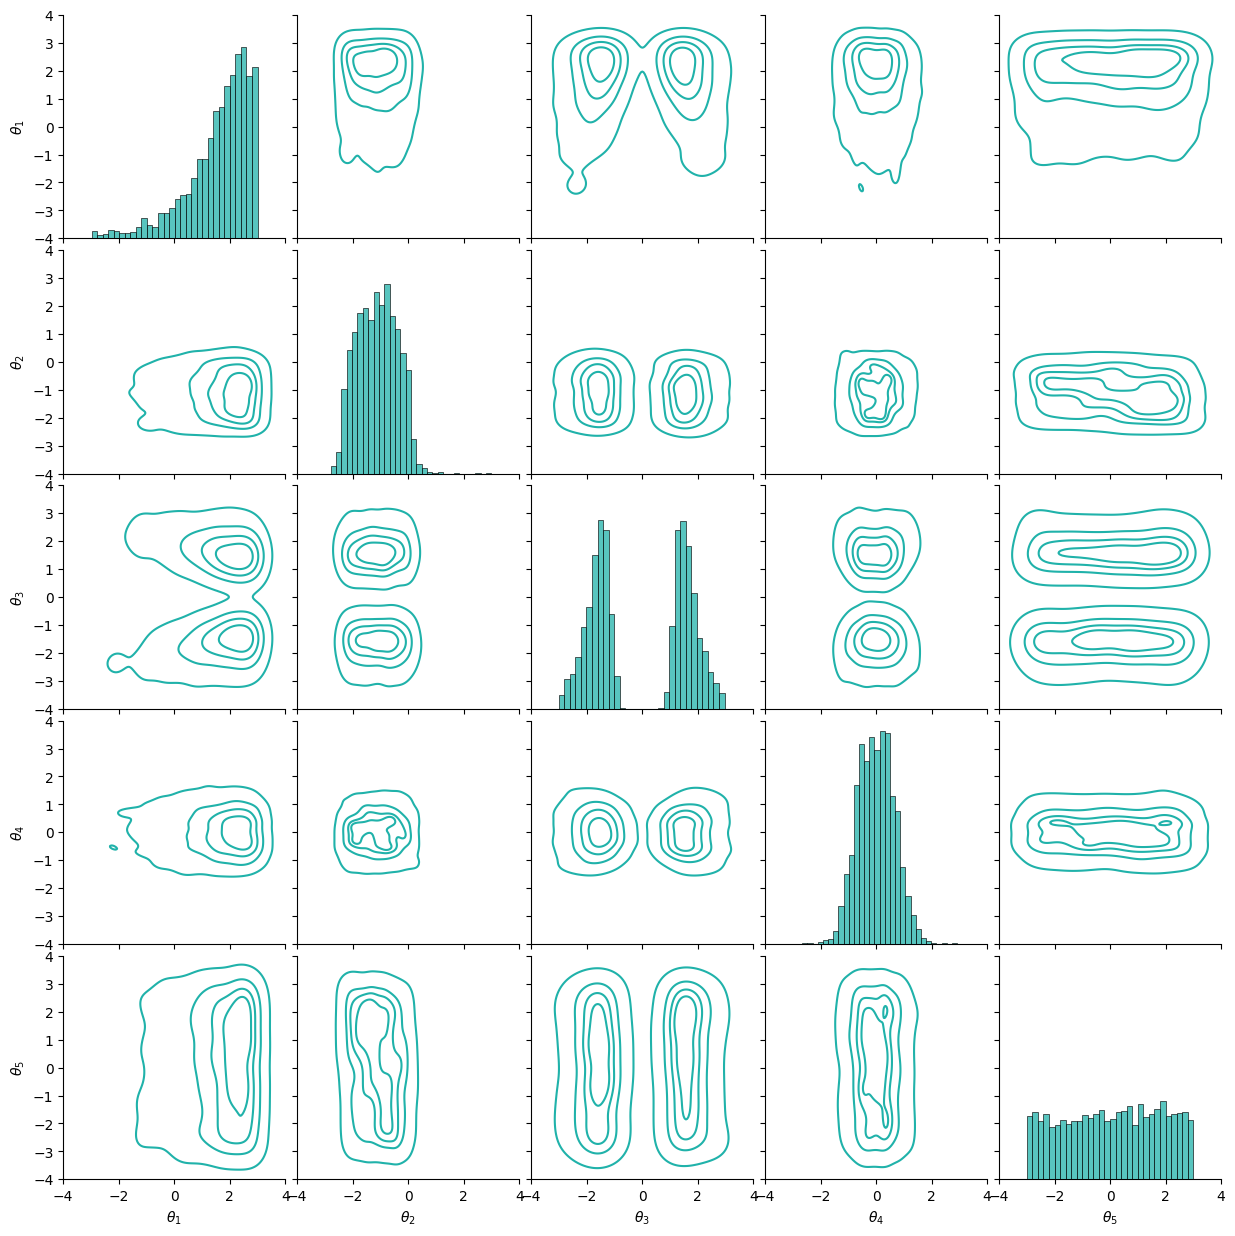

In [28]:
levels = 5

plt.clf()
gt_pairplot = sns.pairplot(gt_df, diag_kind='hist', 
                                kind="kde", 
                                diag_kws={'color': 'lightseagreen', 
                                          'bins':30, 
                                          'edgecolor': 'k',
                                          'stat':'density',
                                          'common_norm':False}, 
                                plot_kws={'color': 'lightseagreen',
                                          'levels':levels},
                                height=2.5)

for i in range(5):
    for j in range(5):
        if i != j:
            gt_pairplot.axes[i, j].set_xlim(-4, 4)
            gt_pairplot.axes[i, j].set_ylim(-4, 4)

### Pairwise density plot for generated samples

<Figure size 640x480 with 0 Axes>

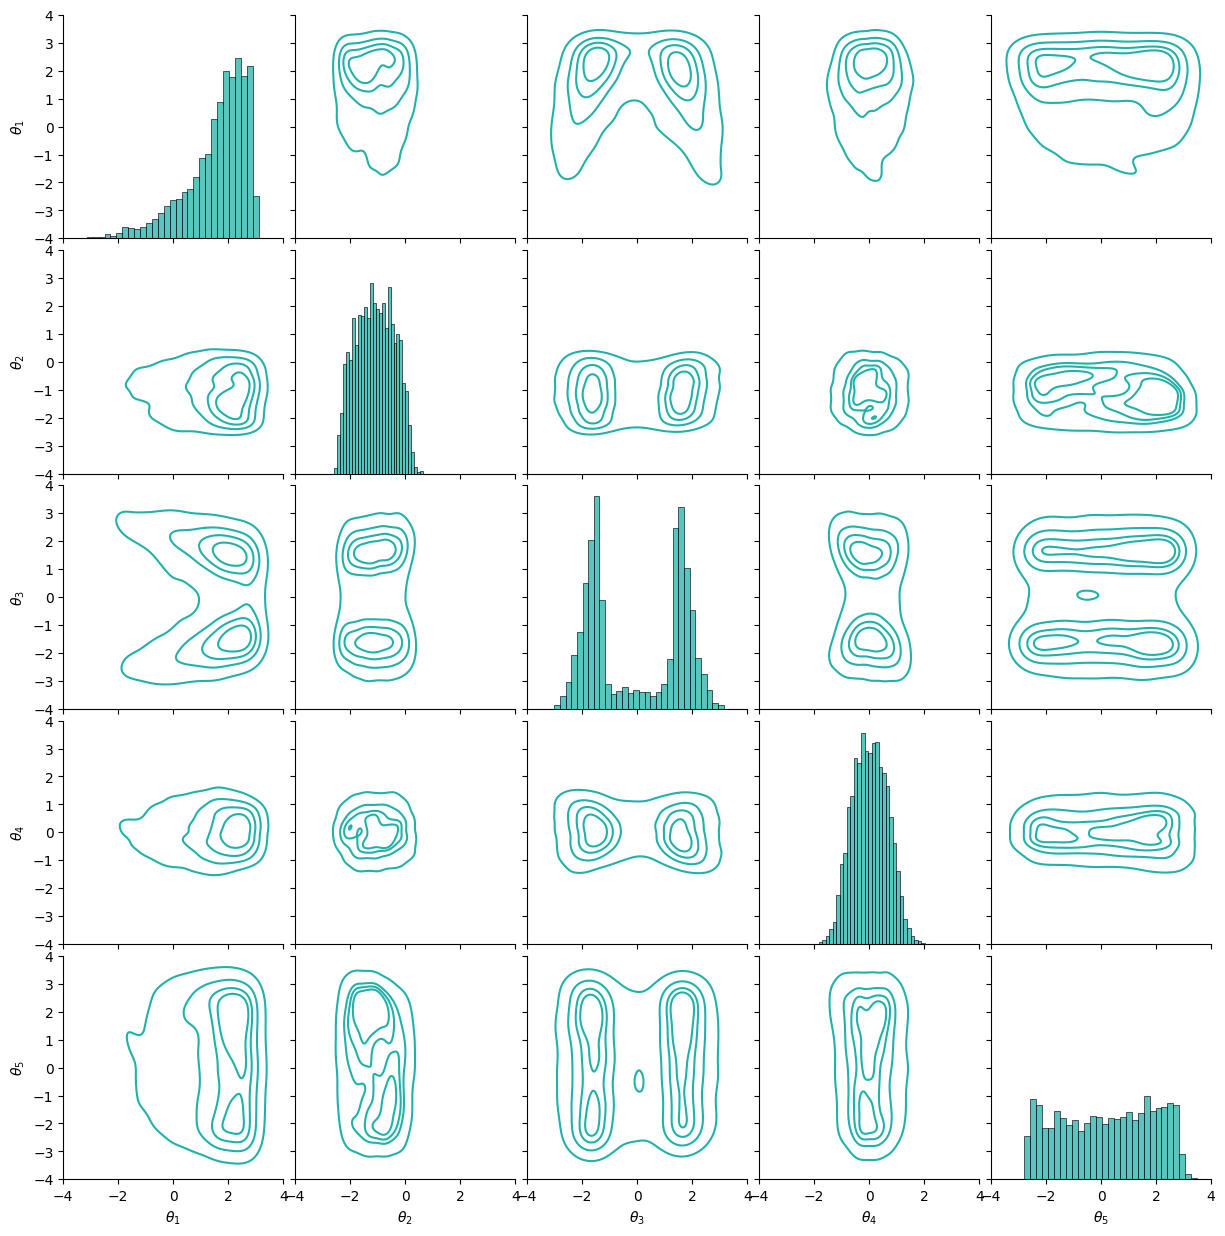

In [29]:
levels = 5

plt.clf()
potnet_pairplot = sns.pairplot(potnet_df, diag_kind='hist', 
                                kind="kde", 
                                diag_kws={'color': 'lightseagreen', 
                                          'bins':30, 
                                          'edgecolor': 'k',
                                          'stat':'density',
                                          'common_norm':False}, 
                                plot_kws={'color': 'lightseagreen',
                                          'levels':levels},
                                height=2.5)

for i in range(5):
    for j in range(5):
        if i != j:
            potnet_pairplot.axes[i, j].set_xlim(-4, 4)
            potnet_pairplot.axes[i, j].set_ylim(-4, 4)